In [40]:
#!python -m pip install git+https://github.com/fastai/fastai.git

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


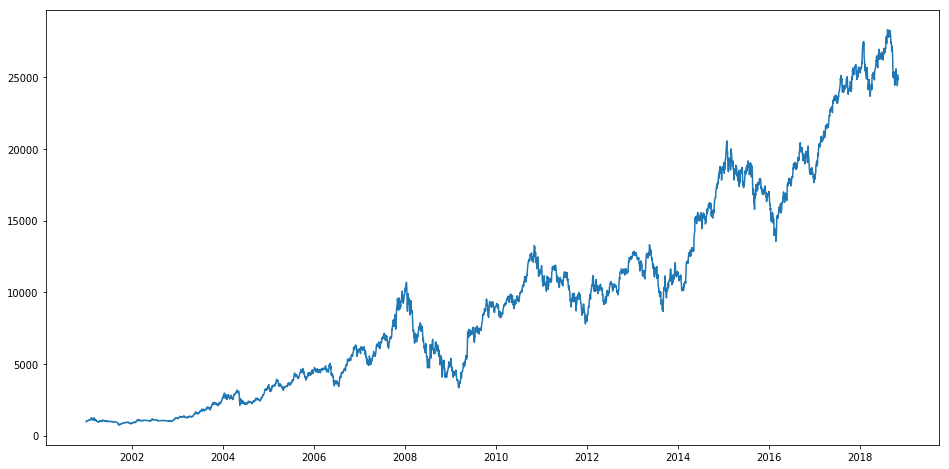

In [41]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [5]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [64]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#splitting into train and validation
upto =len(new_data)-248

print(upto)
train = new_data[:upto]
valid = new_data[upto:]

4191


In [6]:
new_data.shape, train.shape, valid.shape

NameError: name 'train' is not defined

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [43]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM






In [44]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [45]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
upto =len(new_data)-248
print(upto)
train = dataset[0:upto,:]
valid = dataset[upto:,:]

4191


In [46]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 821s - loss: 5.1904e-04


In [196]:
len(closing_price)

248

In [197]:
len(valid)

248

In [97]:
valid['Predictions'] =0
valid['Predictions'] = closing_price
type(valid)
valid

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Close,Predictions
Date,,
2017-11-01,25490.5,24629.898438
2017-11-02,25427.3,24783.187500
2017-11-03,25650.7,24907.794922
2017-11-06,25571.2,25046.468750
2017-11-07,25300.8,25139.080078
2017-11-08,25184.3,25140.207031
2017-11-09,25291.3,25088.644531
2017-11-10,25499,25052.972656
2017-11-13,25358.3,25072.119141


In [98]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['Predictions'])),2)))
rms

477.81607337055107

In [99]:
valid.columns



Index(['Close', 'Predictions'], dtype='object')

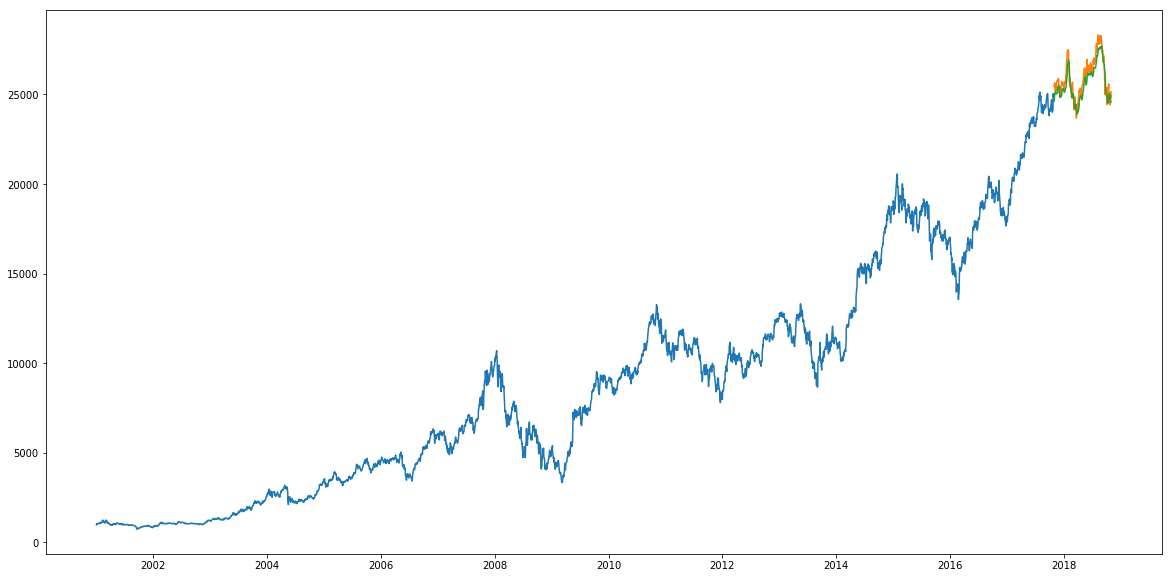

In [100]:
#for plotting
#dataset = new_data.values
#upto =len(new_data)-248
#print(upto)
#train = new_data[:upto]
#valid = new_data[upto:]

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [79]:
from keras.models import model_from_json
import os
symbol = "BANKNIFTY"

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(symbol+".h5")
print("Saved model to disk")


Saved model to disk


Loaded model from disk
248
[[0.8661857 ]
 [0.87174445]
 [0.8762631 ]
 [0.88129187]
 [0.8846502 ]
 [0.88469106]
 [0.88282126]
 [0.88152766]
 [0.882222  ]
 [0.8822775 ]
 [0.8816934 ]
 [0.8805576 ]
 [0.8812751 ]
 [0.8845175 ]
 [0.88813037]
 [0.8910566 ]
 [0.89321035]
 [0.8943795 ]
 [0.8952969 ]
 [0.89675266]
 [0.8976589 ]
 [0.8978419 ]
 [0.8941836 ]
 [0.88918823]
 [0.88389844]
 [0.8800681 ]
 [0.87542194]
 [0.87328666]
 [0.87437445]
 [0.8768923 ]
 [0.877229  ]
 [0.8759675 ]
 [0.87572604]
 [0.87783206]
 [0.8813372 ]
 [0.88547003]
 [0.8879197 ]
 [0.88905776]
 [0.89020294]
 [0.8912152 ]
 [0.8905633 ]
 [0.88954693]
 [0.8889752 ]
 [0.88693565]
 [0.8851426 ]
 [0.8836269 ]
 [0.88366973]
 [0.885243  ]
 [0.8875383 ]
 [0.88979846]
 [0.8908916 ]
 [0.89173484]
 [0.8929329 ]
 [0.8964086 ]
 [0.89899975]
 [0.9032801 ]
 [0.90892285]
 [0.91658086]
 [0.92409176]
 [0.9326009 ]
 [0.9394403 ]
 [0.94462293]
 [0.9484724 ]
 [0.94920504]
 [0.94973075]
 [0.9487247 ]
 [0.94160724]
 [0.9317545 ]
 [0.92097795]
 [0.911

In [192]:

inputs = new_data[len(new_data) - len(valid)-60:].values

In [195]:
new_data.shape

(4439, 1)

In [193]:
len(new_data) - len(valid)-60

4131

In [167]:
new_data[len(new_data)-len(valid)-60:].shape

(308, 1)

In [168]:
inputs = inputs.reshape(-1,1)

In [169]:
len(inputs)


308

In [170]:
inputs.shape[0]

308

In [187]:
val = len(new_data) - len(valid)-60
X_test = []
for i in range(60,inputs.shape[0]):
    print(i)
    X_test.append(inputs[i-60:i,0])
    if i ==307:
        
        print(new_data.iloc[(val+i)-60:val+i])
X_test = np.array(X_test)


60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
              Close
Date               
2018-08-

In [188]:
(len(X_test))


248

In [189]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [190]:
X_test.shape

(248, 60, 1)

In [191]:
inputs  = scaler.transform(inputs)

In [ ]:
from keras.models import model_from_json
import os
from sklearn.preprocessing import MinMaxScaler

symbol = "BANKNIFTY"
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## load weights into new model
loaded_model.load_weights(symbol+".h5")
print("Loaded model from disk")
# 
## evaluate loaded model on test data
loaded_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#
print(len(X_test))
score = loaded_model.predict(X_test)
#print(score)
#score = sc.inverse_transform(score)
print(score)